In [ ]:
import pandas as pd
import pandas_profiling 
import re
import json
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
valid_data = pd.read_json('/content/drive/My Drive/DMS/valid_defects.json')
cancelled_data = pd.read_json('/content/drive/My Drive/DMS/cancelled_defects.json')
valid_data['Status'] = "Valid"
cancelled_data['Status'] = "InValid"
Total_data = pd.concat([valid_data, cancelled_data], ignore_index= True)
Total_data.Status.value_counts()/Total_data.shape[0]

Valid      0.707746
InValid    0.292254
Name: Status, dtype: float64

In [ ]:
def nullcheck(x):
    try:
        if len(x)==0:
            return None
        else:
            return x
    except:
        return None


In [ ]:
def commentsAppend(comment):
    comment_string = ''
    for i in range(len(comment)):
        comment_string = comment_string+' '+(comment[i]['body'])
    return comment_string

In [ ]:
Total_data = pd.concat([valid_data, cancelled_data], ignore_index= True)

In [ ]:
# Text Cleaning
Total_data['Description'] = Total_data.Description.apply(lambda x: re.sub('<[^<]+?>', '', x))
Total_data['Description'] = Total_data.Description.apply(lambda x: re.sub(r'https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE))
Total_data['Description'] = Total_data.Description.apply(lambda x: re.sub("\n+\r", "", x))
Total_data['Description'] = Total_data.Description.apply(lambda x: re.sub(r'\]', ']\\n', x))
Total_data['Description'] = Total_data.Description.apply(lambda x: re.sub(r'\[\~accountid:.*[\r\n]*\]|\/', ' ', x))
# Total_data['Description'] = Total_data.Description.apply(lambda x: re.sub("\n|\r|\[|\]", "", x))
# Total_data['Description'] = Total_data.Description.apply(lambda x: re.sub("\r", "", x))
Total_data['Comments_new'] = Total_data.Comments.apply(lambda x: commentsAppend(x))
Total_data['Comments_new'] = Total_data.Comments_new.apply(lambda x: re.sub('<[^<]+?>', '', x))
Total_data['Comments_new'] = Total_data.Comments_new.apply(lambda x: re.sub(r'https?:\/\/.*[\r\n]*', '', x, flags=re.MULTILINE))
Total_data['Comments_new'] = Total_data.Comments_new.apply(lambda x: re.sub(r'\]', ']\\n', x))
Total_data['Comments_new'] = Total_data.Comments_new.apply(lambda x: re.sub(r'\[\~accountid:.*[\r\n]*\]|\/', ' ', x))
Total_data['Comments_new'] = Total_data.Comments_new.apply(lambda x: re.sub("\n|\r|\[|\]", "", x))
# Total_data.head()

#Clustering (Un Supervised):
## Description text:
Let's try to understand the similarity  in Defects from Descrition information, with help of unsupervised dimentionality reduction and Clustering techniques.

In [ ]:
!pip install datashader bokeh holoviews colorcet top2vec

     |████████████████████████████████| 15.5MB 305kB/s 
     |████████████████████████████████| 1.6MB 49.7MB/s 
     |████████████████████████████████| 81kB 9.0MB/s 
     |████████████████████████████████| 4.7MB 46.5MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.1MB 45.6MB/s 
     |████████████████████████████████| 92kB 8.9MB/s 
     |████████████████████████████████| 655kB 40.9MB/s 
     |████████████████████████████████| 102kB 9.1MB/s 
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2305922 sha256=7494536e8bad72cfd027695524ca615adc8f47c05ab41278d9f7757b42d900a4
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan
  Created wheel for datashape: filename=datashape-0.5.2-cp36-none-any.whl size=59430 sha256=2a8d1897b067da4cfc1438444a0dda04add6600

In [20]:
import umap
import umap.plot
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from top2vec import Top2Vec
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})

%matplotlib inline
from bokeh.plotting import show, save, output_notebook, output_file
from bokeh.resources import INLINE 
output_notebook(resources=INLINE)

Top2Vec will give topics based on Topic modeling and Semantic search technique.

In [ ]:
# Total_data = Total_data.reset_index(drop=True)
top2vec = Top2Vec(documents=Total_data.Description, speed="learn", workers=4)
top2vec.get_num_topics()

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


80

In [ ]:
topic_sizes, topic_nums = top2vec.get_topic_sizes()
print(topic_sizes)
print(topic_nums)

[517 279 277 256 246 229 227 197 186 157 153 146 143 142 136 133 129 126
 120 120 115 115 114 110  97  96  94  94  92  91  91  87  87  85  83  77
  72  72  71  69  68  66  65  64  63  63  62  62  60  59  58  57  56  55
  49  48  48  48  48  47  47  46  45  45  45  43  43  43  41  41  40  38
  38  37  37  35  34  34  32  27]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79]


[55 52  4]


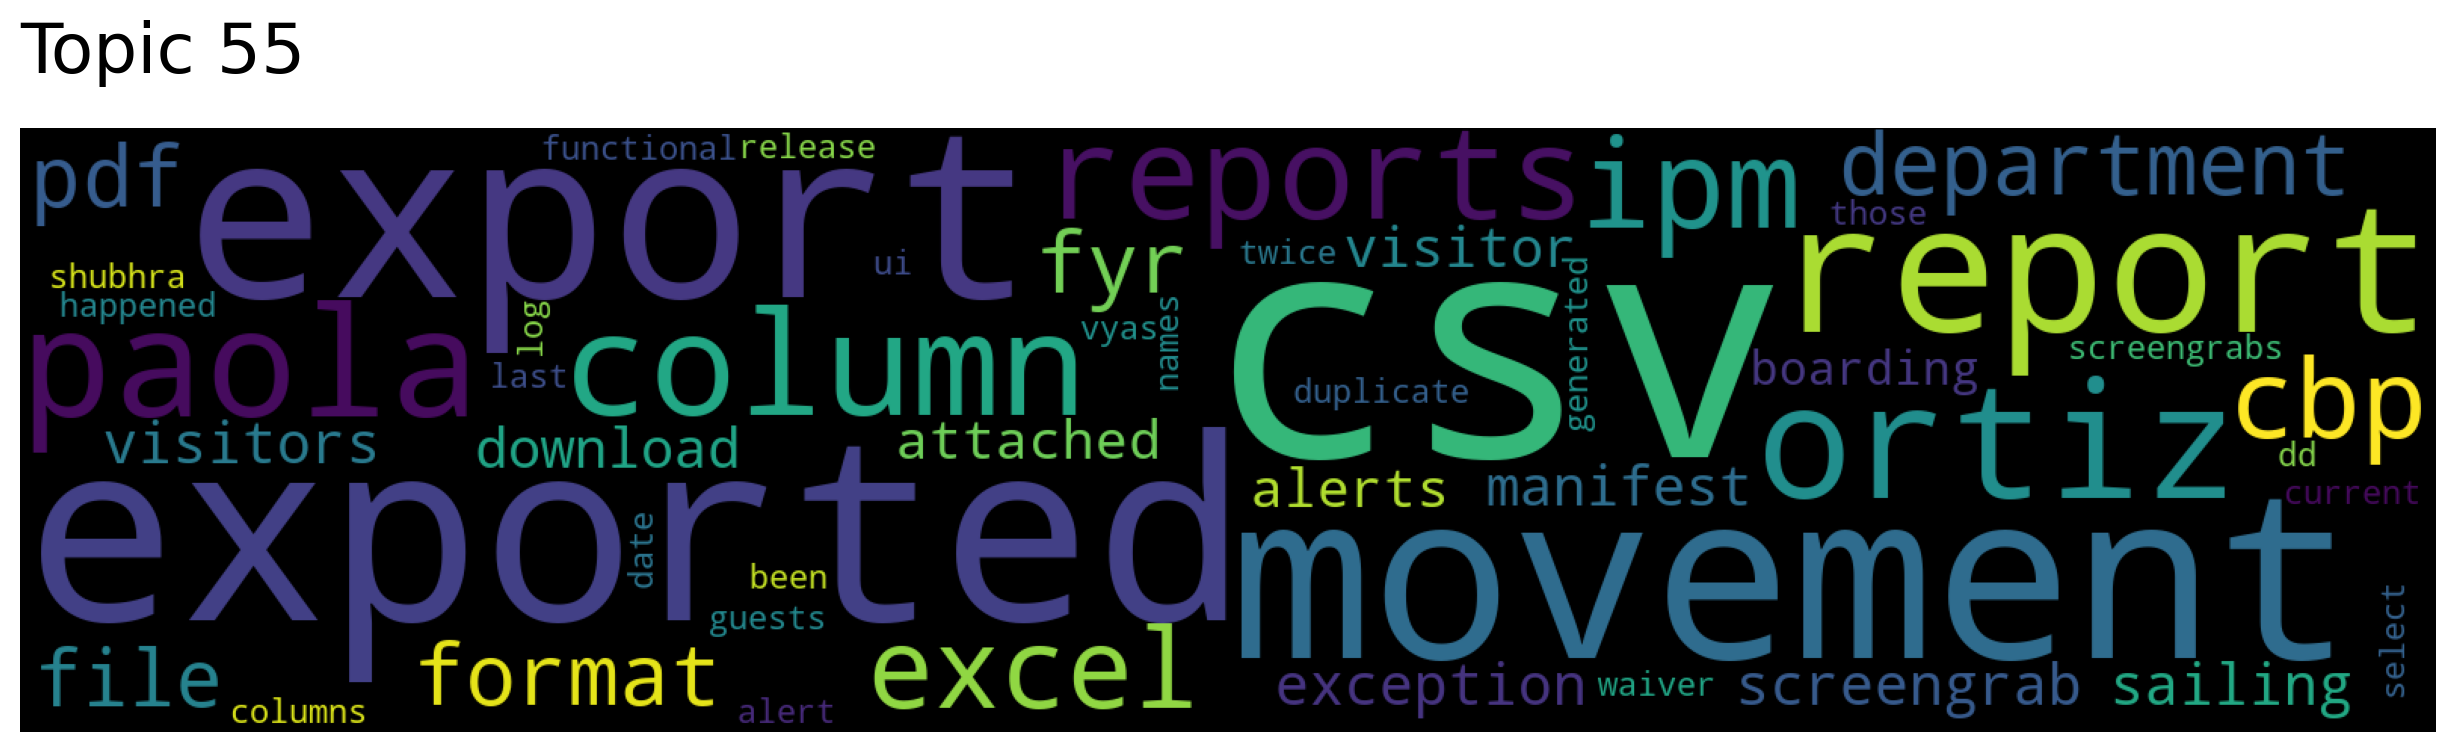

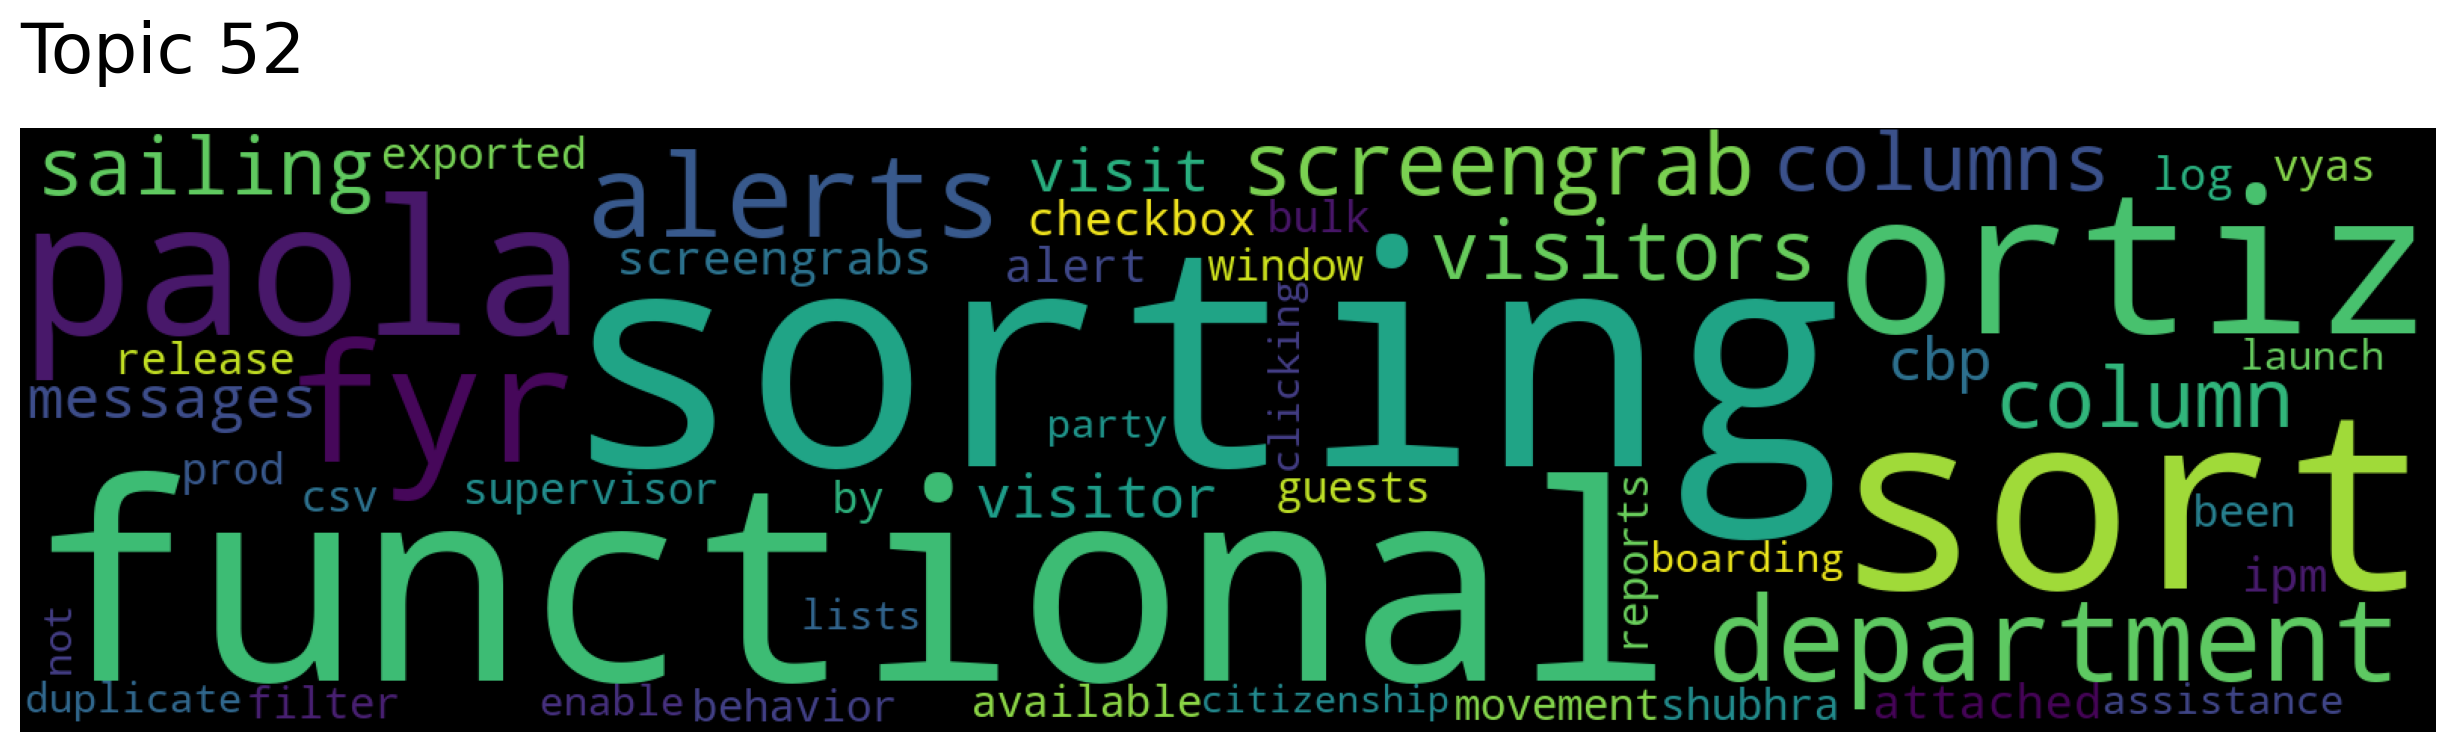

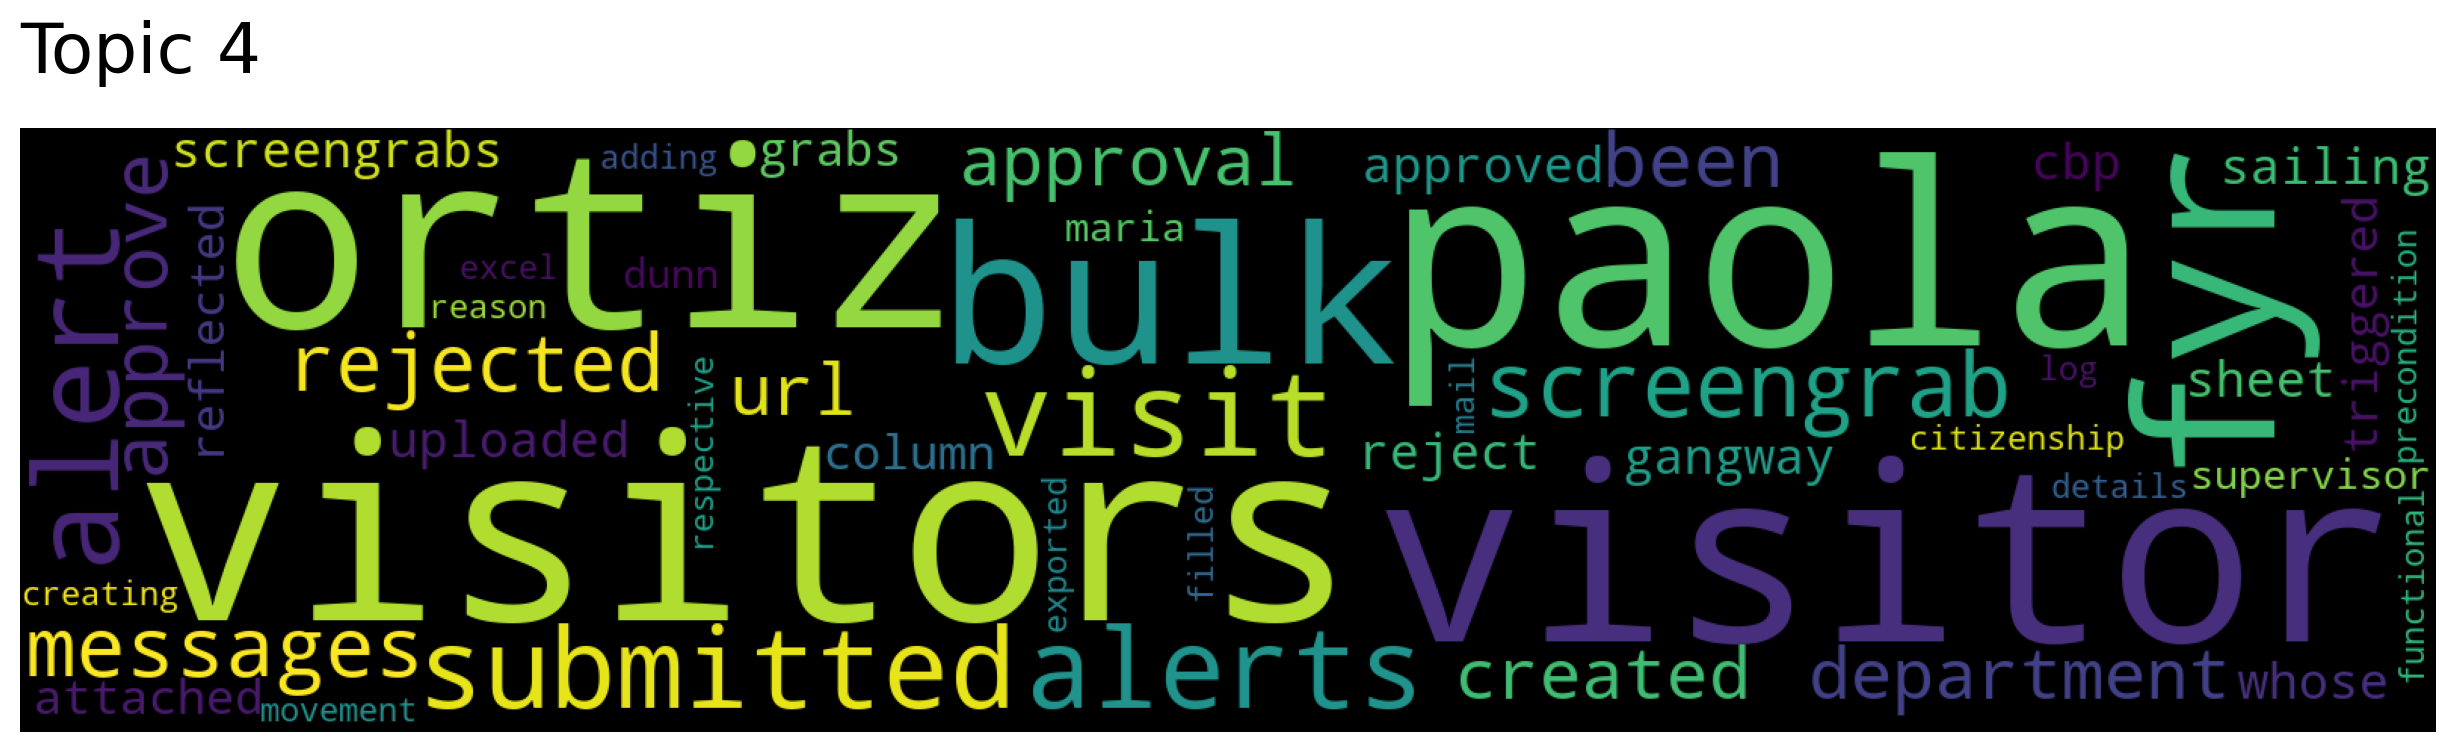

In [21]:
topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(keywords=["duplicate"], num_topics=3)
print(topic_nums)
for topic in topic_nums:
    top2vec.generate_topic_wordcloud(topic)

In [22]:
Total_data = Total_data.reset_index(drop=True)
tfidf_vectorizer = TfidfVectorizer(min_df=7, stop_words='english', analyzer='word')
tfidf_word_doc_matrix = tfidf_vectorizer.fit_transform(Total_data.Description)


In [23]:
embedding_tfidf = umap.UMAP(n_components=2, n_neighbors=35, metric='hellinger').fit(tfidf_word_doc_matrix)
hover_df = Total_data.Application.to_frame()
print(embedding_tfidf.embedding_.shape, hover_df.shape)

(7668, 2) (7668, 1)


In [24]:
f = umap.plot.interactive(embedding_tfidf, labels=Total_data.Status, cmap='Oranges', color_key_cmap='RdBu',
                          hover_data=hover_df, 
                          point_size=3)
f.title.text = "Description UMAP Plot With Application in ToolTip"
f.title.align = "center"
f.title.text_color = "green"
show(f)

Output hidden; open in https://colab.research.google.com to view.

In [25]:
hover_df = Total_data.Application.to_frame()
print(embedding_tfidf.embedding_.shape, hover_df.shape)
f = umap.plot.interactive(embedding_tfidf, labels=Total_data.Status, cmap='Oranges', color_key_cmap='RdBu',
                          hover_data=hover_df, 
                          point_size=3)
f.title.text = "Description UMAP Plot With Priority in ToolTip"
f.title.align = "center"
f.title.text_color = "green"
show(f)

Output hidden; open in https://colab.research.google.com to view.

In [26]:
#Count Vectorizer data
count_vectorizer = CountVectorizer(min_df=5, stop_words='english')
word_doc_matrix = count_vectorizer.fit_transform(Total_data.Description)

embedding_count = umap.UMAP(n_components=2, n_neighbors=35, metric='hellinger').fit(word_doc_matrix)
hover_df = Total_data.Application.to_frame()
print(embedding_count.embedding_.shape, hover_df.shape)

(7668, 2) (7668, 1)


In [27]:
f = umap.plot.interactive(embedding_count, labels=Total_data.Status, cmap='Oranges', color_key_cmap='RdBu',
                          hover_data=hover_df, 
                          point_size=3)
f.title.text = "Description (Count_vec) UMAP Plot With Application in ToolTip"
f.title.align = "center"
f.title.text_color = "green"
show(f)

Output hidden; open in https://colab.research.google.com to view.

## Comments Text 
Here we are trying to do clsuetering on Comment text of Invalid Tickets

In [28]:
Invalid_data = Total_data[Total_data.Status == 'InValid']
Invalid_data = Invalid_data.reset_index(drop=True)
tfidf_vectorizer = TfidfVectorizer(min_df=7, stop_words='english', analyzer='word')
tfidf_comment_doc_matrix = tfidf_vectorizer.fit_transform(Invalid_data.Comments_new)

embedding_tfidf_comment = umap.UMAP(n_components=2, n_neighbors=35, metric='hellinger').fit(tfidf_comment_doc_matrix)
hover_df = Invalid_data.Application.to_frame()
print(embedding_tfidf_comment.embedding_.shape, hover_df.shape)

(2241, 2) (2241, 1)


In [29]:
f = umap.plot.interactive(embedding_tfidf_comment, labels=Invalid_data.Priority, cmap='Oranges', color_key_cmap='RdBu_r',
                          hover_data=hover_df, 
                          point_size=3)
f.title.text = "Description UMAP Plot With Application in ToolTip"
f.title.align = "center"
f.title.text_color = "green"
show(f)

Output hidden; open in https://colab.research.google.com to view.

In [31]:
hover_df = Invalid_data.Priority.to_frame()
print(embedding_tfidf_comment.embedding_.shape, hover_df.shape)
f = umap.plot.interactive(embedding_tfidf_comment, labels=Invalid_data.Application, cmap='Oranges', color_key_cmap='RdBu_r',
                          hover_data=hover_df, 
                          point_size=3)
f.title.text = "Description UMAP Plot With Priority in ToolTip"
f.title.align = "center"
f.title.text_color = "green"
show(f)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
## End of Clustering